2. Perform linear regression with L1 (Lasso) and L2 (Ridge) regularization to predict the price of a House. Use hyper-parameter tuning for the best result. Evaluate the accuracy of the models by computing relevant performance metrics, including the R² value. Generate and display a plot that compares the actual values to the predicted values (Actual vs Predicted) for both tasks. Dataset: housing_price_dataset.csv

Lasso Regression - Best Alpha: 0.1
Lasso Regression - R² Score: 0.9180, MSE: 10089007626.9052
Ridge Regression - Best Alpha: 1.0
Ridge Regression - R² Score: 0.9180, MSE: 10089005431.7701


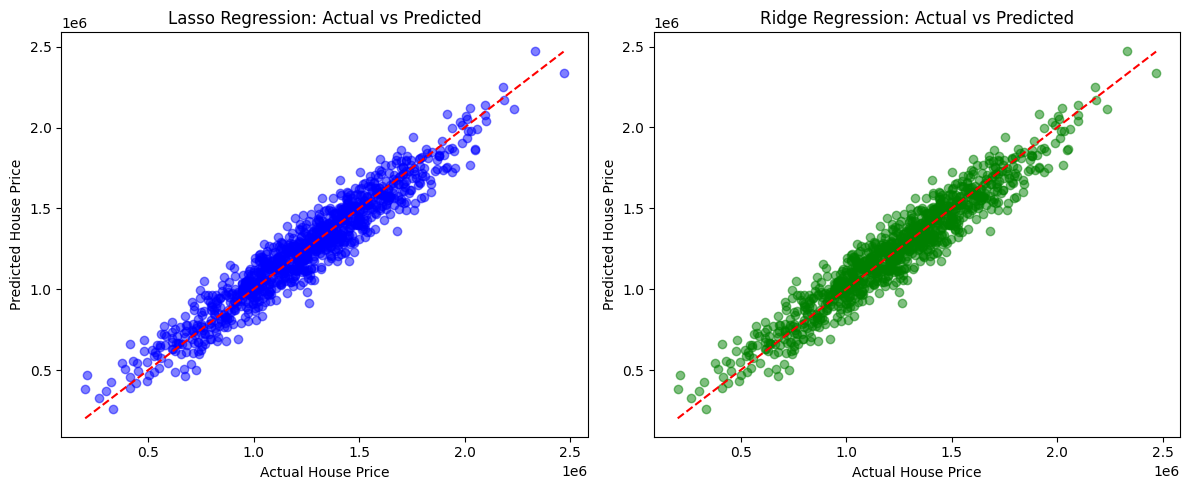

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('housing_price_dataset.csv')

# Clean the dataset
df = df.drop(columns=['Address'], errors='ignore')  # Drop non-numeric columns
df = df.dropna()  # Drop missing values

# Prepare features and target
X = df.iloc[:, :-1]  # All columns except the last (features)
y = df.iloc[:, -1]   # Last column (target: house price)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Lasso Regression
param_grid = {'alpha': np.logspace(-3, 3, 7)}
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

# Hyperparameter tuning for Ridge Regression
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

# Make predictions
y_pred_lasso = best_lasso.predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate the models
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso Regression - Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression - R² Score: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}")

print(f"Ridge Regression - Best Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}")

# Visualize Actual vs Predicted Values
plt.figure(figsize=(12, 5))

# Lasso plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Lasso Regression: Actual vs Predicted")

# Ridge plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Ridge Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()

The provided code performs **linear regression with L1 (Lasso) and L2 (Ridge) regularization** to predict house prices using the dataset `housing_price_dataset.csv`. Below is a step-by-step explanation:

---

### **1. Import Required Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

- **`pandas`**: For loading and manipulating the dataset.
- **`numpy`**: For numerical computations.
- **`matplotlib.pyplot`**: For visualizing the results.
- **`sklearn.model_selection`**: For splitting the dataset and performing hyperparameter tuning using `GridSearchCV`.
- **`sklearn.linear_model`**: For Lasso (L1) and Ridge (L2) regression models.
- **`sklearn.preprocessing`**: For standardizing the features using `StandardScaler`.
- **`sklearn.metrics`**: For evaluating the model's performance using R² and Mean Squared Error (MSE).

---

### **2. Load and Clean the Dataset**


In [ ]:
df = pd.read_csv('housing_price_dataset.csv')

# Drop non-numeric columns
df = df.drop(columns=['Address'], errors='ignore')

# Drop missing values
df = df.dropna()

- The dataset is loaded using `pandas.read_csv()`.
- The **`Address`** column (non-numeric) is dropped since it is not useful for regression.
- Missing values are removed using `dropna()`.

---

### **3. Prepare Features and Target**


In [ ]:
X = df.iloc[:, :-1]  # All columns except the last (features)
y = df.iloc[:, -1]   # Last column (target: house price)

- **`X`**: Contains all columns except the last one (features).
- **`y`**: Contains the last column, which is the target variable (house price).

---

### **4. Standardize the Features**


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- The features are standardized to have a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale, which is important for regularization techniques like Lasso and Ridge.

---

### **5. Split the Dataset**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

- The dataset is split into training (80%) and testing (20%) sets using `train_test_split()`.

---

### **6. Hyperparameter Tuning for Lasso Regression**


In [ ]:
param_grid = {'alpha': np.logspace(-3, 3, 7)}  # Define a range of alpha values
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

- **`alpha`**: Regularization strength. A higher value means more regularization.
- **`GridSearchCV`**: Performs cross-validation to find the best `alpha` value from the range `np.logspace(-3, 3, 7)` (0.001 to 1000).
- **`best_lasso`**: The Lasso model with the best `alpha` value.

---

### **7. Hyperparameter Tuning for Ridge Regression**


In [ ]:
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

- Similar to Lasso, `GridSearchCV` is used to find the best `alpha` value for Ridge regression.
- **`best_ridge`**: The Ridge model with the best `alpha` value.

---

### **8. Make Predictions**


In [ ]:
y_pred_lasso = best_lasso.predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)

- Predictions are made on the test set using the best Lasso and Ridge models.

---

### **9. Evaluate the Models**


In [ ]:
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso Regression - Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression - R² Score: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}")

print(f"Ridge Regression - Best Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}")

- **`r2_score`**: Measures how well the model explains the variance in the data (closer to 1 is better).
- **`mean_squared_error`**: Measures the average squared difference between actual and predicted values (lower is better).
- The best `alpha` values, R² scores, and MSEs for both models are printed.

---

### **10. Visualize Actual vs Predicted Values**


In [ ]:
plt.figure(figsize=(12, 5))

# Lasso plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Lasso Regression: Actual vs Predicted")

# Ridge plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Ridge Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()

- Two scatter plots are created:
  - **Lasso Regression**: Compares actual vs predicted house prices.
  - **Ridge Regression**: Compares actual vs predicted house prices.
- The red dashed line represents the ideal case where actual = predicted.

---

### **Key Outputs**
1. **Best Alpha Values**:
   - The optimal regularization strength for Lasso and Ridge regression.
2. **Performance Metrics**:
   - R² Score: Indicates how well the model explains the variance in the data.
   - MSE: Measures the average squared error.
3. **Visualization**:
   - Scatter plots comparing actual vs predicted house prices for both models.

---

### **Summary**
- The code implements **linear regression with L1 (Lasso) and L2 (Ridge) regularization**.
- **Hyperparameter tuning** is performed using `GridSearchCV` to find the best `alpha` values.
- The models are evaluated using R² and MSE, and the results are visualized with scatter plots.
- This approach ensures robust predictions by addressing overfitting (via regularization).

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

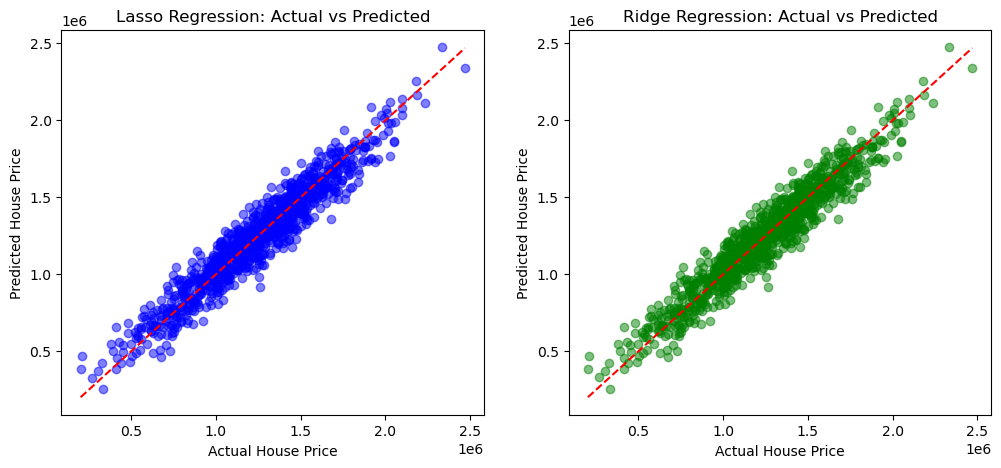

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv('housing_price_dataset.csv')

# Check for non-numeric columns
print(df.dtypes)

# Drop columns that are clearly non-numeric (e.g., Address, Street Name)
df = df.drop(columns=['Address'])  # Ignore if column doesn't exist

# Handle missing values (drop or impute)
df = df.dropna()

# Convert categorical variables into numerical using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Ensure target variable is numeric
df.iloc[:, -1] = pd.to_numeric(df.iloc[:, -1], errors='coerce')

# Drop any remaining NaN values (if any exist after conversion)
df = df.dropna()

# Select features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except last (assuming last column is 'Price')
y = df.iloc[:, -1]   # Last column (house price)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {'alpha': np.logspace(-3, 3, 7)}

# Lasso Regression (L1)
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

# Ridge Regression (L2)
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

# Predictions
y_pred_lasso = best_lasso.predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)

# Performance Metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso Regression - Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression - R² Score: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}")

print(f"Ridge Regression - Best Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Lasso Regression: Actual vs Predicted")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Ridge Regression: Actual vs Predicted")

plt.show()
